
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

(b) (5pts) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.

# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

(a) (1pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

In [12]:
print (data.shape)
print (data.head())

(200, 4)
      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


(b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

AxesSubplot(0.125,0.125;0.775x0.755)
Outlier Cutoffs:


,TV,Radio,Newspaper,Sales
0.25,74.375,9.975,12.75,10.375
0.75,218.825,36.525,45.10,17.400


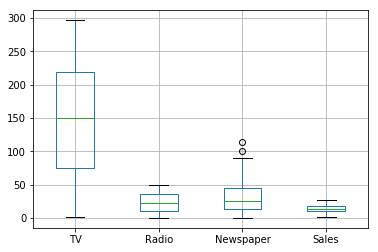

In [21]:
print (data.boxplot())

#return quantiles of data to get Q1 and Q3
print ('Outlier Cutoffs:')
data.quantile([0.25, 0.75])

(c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

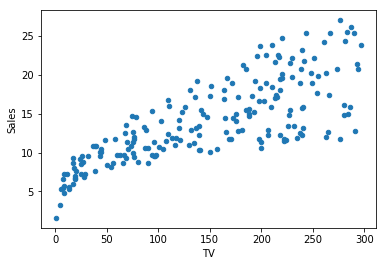

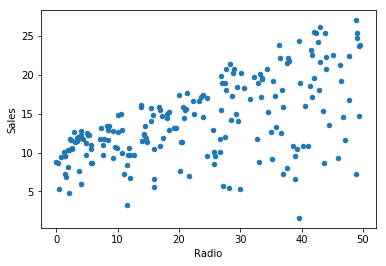

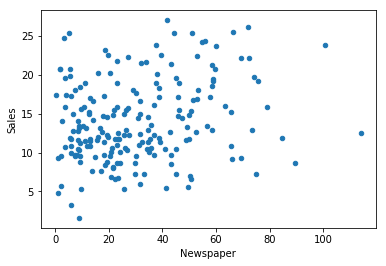

In [41]:
features = ['TV', 'Radio', 'Newspaper']
for i in features:
    data.plot.scatter(x = i, y = 'Sales')

The plot of TV to Sales has a much tighter fit than Radio and Newspaper. There is less variance in the y residuals. 
In the TV and Radio plots there is a clear linear relationship seen, but it's harder to see for the Newspaper plot. 

(d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

In [55]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
%pylab inline

X = data[['TV']]
Y = data[['Sales']]

reg = linear_model.LinearRegression()
reg.fit(X,Y)

print('Coefficient:', reg.coef_)

Populating the interactive namespace from numpy and matplotlib
Coefficient: [[0.04753664]]


The coefficient of TV to sales is 0.04753664. This means that for each additional thousand dollars spent on TV, then there will be an increase in 0.0475 thousand dollars, or $47.5 in sales. 

Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

(e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

In [57]:
from sklearn.model_selection import train_test_split
X = data[features]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33, random_state=42)

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#fit model using X_train, Y_train
reg2 = linear_model.LinearRegression()
reg2.fit(X_train,Y_train)

#predicts Y's based on our model
test_pred = reg2.predict(X_test)

#mean squared error
print ("RMSE:", sqrt(mean_squared_error(Y_test, test_pred)))
print ("MSE:", mean_squared_error(Y_test, test_pred))

RMSE: 1.93078438223472
MSE: 3.7279283306815088


(f) (2pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

In [64]:
train_pred = reg2.predict(X_train)
print ("RMSE:", sqrt(mean_squared_error(Y_train, train_pred)))
print ("MSE:", mean_squared_error(Y_train, train_pred))

RMSE: 1.5526939990087725
MSE: 2.410858654557854


The RMSE increases by 0.378 when you run the model on test data versus train data.
## more interpretation???

(g) (1pts) Report the coefficients obtained by your model.

In [65]:
# The coefficients
print('Coefficients: \n', reg2.coef_)

Coefficients: 
 [[0.04466512 0.19663006 0.00607439]]


# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [66]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=10) 

/Users/aashishkumar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


a) (2 points) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

b)  (3 points) Now fit the regression model using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)

c) (2 points ) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.

d) (3 points) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

e) (5 points) Calaculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

In [5]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 5000.0

Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.

f) (5 points ) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and y_train for your model.

g) (5 points) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and y_train for your model. Hint : Use a for loop to implement forward feature selection

In [6]:
feature_name = ['x'+str(i) for i in range(1,11)]
print(feature_name)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']


# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

(c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

## Answer

Please see attached photo!

from IPython.display import Image
![title](HW2_Q3.png)

# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [154]:
import pandas as pd

df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)

(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

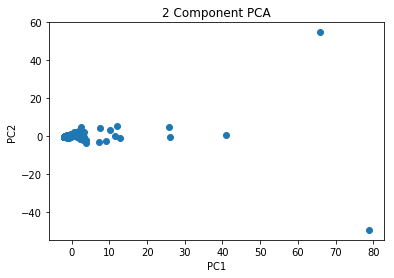

In [191]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 15)
pcatransform = pca.fit_transform(df_scaled) #fit_transform 
#components only returns the loadings, you need to multiply loadings w/ feature matrix to get components
#fit_transform fits the model with X AND applies the dimensionality reduction on X

# in pcatransform, each row is a country and each column is a PC. Therefore we only want the first item of each row to get PC1
X = pcatransform[:,0]
Y = pcatransform[:,1]

#plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('2 Component PCA')
ax.scatter(X, Y)

#components = loadings, vectors
#need to take loadings and multiply it to the matrix

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

In [208]:
index = df.reset_index()
countries = pd.DataFrame(index['Country'])
countries['PC1'] = X
print (countries.sort_values(by = 'PC1', ascending = False)[:6])

     Country        PC1
42     China  78.808512
37    Canada  65.904733
135   Mexico  40.812633
104    Japan  26.098581
79   Germany  25.743293
102    Italy  12.843229


(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.

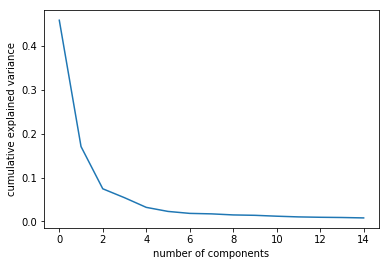

In [209]:
#i Proportion of Variance explained 
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

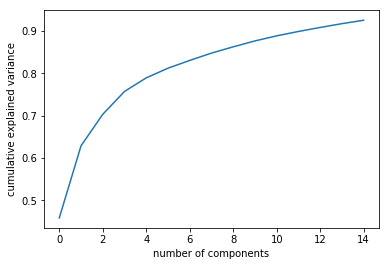

In [166]:
#ii Cumulative Variance Explains
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [228]:
sum = 0
PC = 0
for i in pca.explained_variance_ratio_:
    sum += i
    PC += 1
    print (PC,":",sum)

1 : 0.45836493185657173
2 : 0.6289169210862304
3 : 0.7033189431092203
4 : 0.7574117526930209
5 : 0.789500837914859
6 : 0.8123537049594145
7 : 0.8307274087570057
8 : 0.8480062682333923
9 : 0.8628564496453709
10 : 0.876828481618424
11 : 0.8887957267247797
12 : 0.8991541234552795
13 : 0.9086637183384683
14 : 0.9176572466600242
15 : 0.925706641123197


(d) (2pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

Based off of the scree plots, it seems that 30% of the variance is explained with less than one principal component (so 1 principal component is only needed to get 30% of the variance. 60% of the variance is explained with 1 principal component, and 90% of the variance is explained with 14 principal components. 

However to be sure, if we sum the variance explained for each additional PC and look at the list, Only 1 PC is needed to explain 30% of the variance. Then 2 PCs explain over 60% of the variance, and 13 PCs will explain 90 % of the variance.  

# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.

(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

## a

We use PCA when we have too many dimensions or features in our data that cause noise and difficulties. By replacing our features with the principal components, we reduce the number of features in the data to get better perspective and less complexity. It's also easier to visualize a 2D plot vs. a 3D plot. 

In addition, we also use PCA when our feature variables are collinear or correlated with each other. Using PCA, we can extract "new" independent variables, where each "new" independent variable is a combination of the "old" x variables, and keep the most important ones. Therefore, we can insure our features will be independent of each other. 

## b

Eigenvectors are the principal components of a dataset. They determine the directions of a new feature space. 

Each eigenvector is associated with an eigenvalue that is the length and magnitude of the corresponding eigenvector. They explain the variance of the data along the new feature axes.  